<a href="https://colab.research.google.com/github/jayaprabhapalani/projects/blob/main/Heart_disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Heart disease prediction**

1.**Dataset**

   This is a multivariate type of dataset which means providing or involving a variety of separate mathematical or statistical variables, multivariate numerical data analysis. It is composed of 14 attributes which are age, sex, chest pain type, resting blood pressure, serum cholesterol, fasting blood sugar, resting electrocardiographic results, maximum heart rate achieved, exercise-induced angina, oldpeak — ST depression induced by exercise relative to rest, the slope of the peak exercise ST segment, number of major vessels and Thalassemia.

Column Descriptions:

id (Unique id for each patient)

age (Age of the patient in years)

dataset (place of study)

sex (Male/Female)

cp Chest pain type:
typical angina,
atypical angina,
non-anginal,
asymptomatic,

trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))

chol (serum cholesterol in mg/dl)

fbs (if fasting blood sugar > 120 mg/dl)

restecg (resting electrocardiographic results)

Values: [normal, stt abnormality, lv hypertrophy]

thalach: maximum heart rate achieved

exang: exercise-induced angina (True/ False)

oldpeak: ST depression induced by exercise relative to rest

slope: the slope of the peak exercise ST segment

ca: number of major vessels (0-3) colored by fluoroscopy

thal: [normal; fixed defect; reversible defect]

num: the predicted attribute

**Aim**: To perform exploratory data analysis (EDA) and build a machine learning model that accurately predicts heart disease, helping in early detection and improving healthcare decisions.

**Objectives**:

1.Explore the Data: Analyze the dataset to understand key patterns and relationships through EDA.

2.Feature Engineering: Create or modify features to improve model accuracy.

3.Model Building: Develop and compare various machine learning models.

4.Model Evaluation: Measure model performance using accuracy, precision, recall, and F1-score.

5.Insights: Identify the key factors contributing to heart disease and provide actionable insights.

**Import libraries**

In [1]:
#To handle the data
import pandas as pd
import numpy as np

# to visualize the dataset
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# To preprocess the data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer, KNNImputer
# import iterative imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# machine learning
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
#for classification tasks
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestRegressor
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
#pipeline
from sklearn.pipeline import Pipeline
#metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error, mean_squared_error, r2_score

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

**Load the dataset**

In [3]:
#load the dataset placed in our local pc
df = pd.read_csv('/content/drive/MyDrive/heart_disease_uci.csv')

#display the first 5 rows of the dataset
df.head()


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


**Exploratory Data Analysis (EDA)**

In [4]:
#exploring data types of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [5]:
#data shape
df.shape

(920, 16)

ID Column

In [6]:
#id column
df['id'].min(), df['id'].max()

(1, 920)

id column is a unique identifier for each patient, it is not useful for our analysis.

Age Column

In [7]:
#age column
df['age'].min(), df['age'].max()

(28, 77)

Observation: The minimum age of the patient is 28 years

In [8]:
# summarize age column
df['age'].describe()

,age
count,920.000000
mean,53.510870
std,9.424685
min,28.000000
25%,47.000000
50%,54.000000
75%,60.000000
max,77.000000


Text(0.5, 1.0, 'Age Distribution')

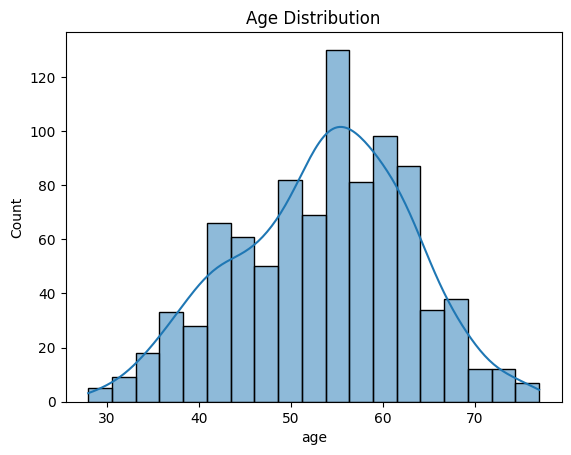

In [9]:
#histogram to see the distribution of age
sns.histplot(df['age'], kde=True)
plt.title('Age Distribution')

Mean: 53.51086956521739
Median: 54.0
Mode: 54


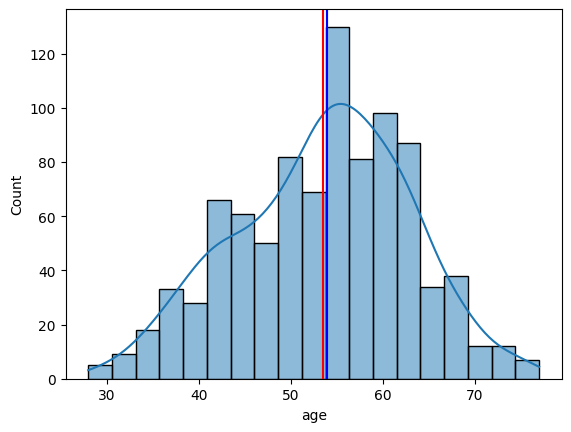

In [10]:
#mean, median, & mode of age column
sns.histplot(df['age'], kde=True)
plt.axvline(df['age'].mean(), color='red')
plt.axvline(df['age'].median(), color='green')
plt.axvline(df['age'].mode()[0], color='blue')

# print the value of mean, median and mode of age column
print('Mean:', df['age'].mean())
print('Median:', df['age'].median())
print('Mode:', df['age'].mode()[0])

Explore Gender Distribution based on age

In [11]:
#histogram to see the distribution of gender on age using plotly
fig = px.histogram(df, x='age', color='sex')
fig.show()

Sex Column

In [12]:
#value counts of gender
df['sex'].value_counts()

,count
sex,
Male,726
Female,194


In [13]:
#Male & female percenatge in our dataset
male_count = 726
female_count = 194
total_count = male_count + female_count

# calculate percentages
male_percentage = (male_count / total_count) * 100
female_percentage = (female_count / total_count) * 100

# display the results
print(f"Male percentage in the data: {male_percentage:.2f}%")
print(f"Female Percentage in the data: {female_percentage:.2f}%")

# difference
difference_percentage = ((male_count - female_count) / female_count) * 100
print(f"Males are {difference_percentage:.2f}% more than females in the data.")

Male percentage in the data: 78.91%
Female Percentage in the data: 21.09%
Males are 274.23% more than females in the data.


Dataset Column

In [14]:
#dataset column
df['dataset'].unique()

array(['Cleveland', 'Hungary', 'Switzerland', 'VA Long Beach'],
      dtype=object)

In [15]:
#value counts in dataset column
df['dataset'].value_counts()

,count
dataset,
Cleveland,304
Hungary,293
VA Long Beach,200
Switzerland,123


In [16]:
# Create a bar chart with counts
fig = px.bar(df, x='dataset', color='sex', barmode='group')

# Add counts as text labels
df_counts = df.groupby(['dataset', 'sex']).size().reset_index(name='count')
fig = px.bar(df_counts, x='dataset', y='count', color='sex', barmode='group', text='count')


fig.show()

In [17]:
#plot the distribution of age on dataset
fig = px.histogram(df, x='age', color='dataset')
fig.show()

#mean, median, & mode of age column on dataset column
print(f"Mean of age based on dataset: {df.groupby('dataset')['age'].mean()}")
print("-------------------------------------")
print(f"Median of age based on dataset: {df.groupby('dataset')['age'].median()}")
print("-------------------------------------")
print(f"Mode of age based on dataset: {df.groupby('dataset')['age'].agg(pd.Series.mode)}")
print("-------------------------------------")

Mean of age based on dataset: dataset
Cleveland        54.351974
Hungary          47.894198
Switzerland      55.317073
VA Long Beach    59.350000
Name: age, dtype: float64
-------------------------------------
Median of age based on dataset: dataset
Cleveland        55.5
Hungary          49.0
Switzerland      56.0
VA Long Beach    60.0
Name: age, dtype: float64
-------------------------------------
Mode of age based on dataset: dataset
Cleveland              58
Hungary                54
Switzerland            61
VA Long Beach    [62, 63]
Name: age, dtype: object
-------------------------------------


CP (Chest Pain) Column

In [18]:
#value counts of chest pain column
df['cp'].value_counts()

,count
cp,
asymptomatic,496
non-anginal,204
atypical angina,174
typical angina,46


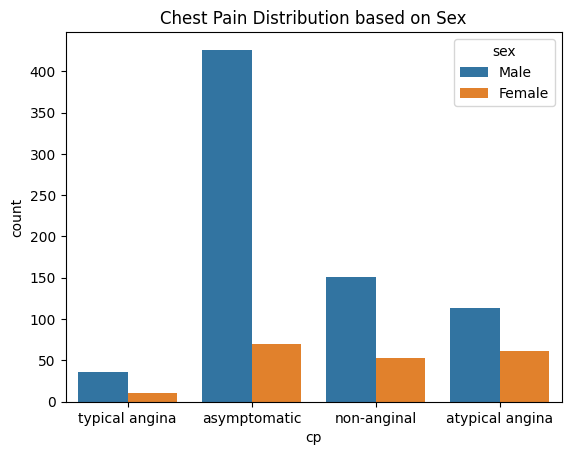

In [19]:
#plot the cp column using sns
sns.countplot(data=df, x='cp', hue='sex')
plt.title('Chest Pain Distribution based on Sex')
plt.show()

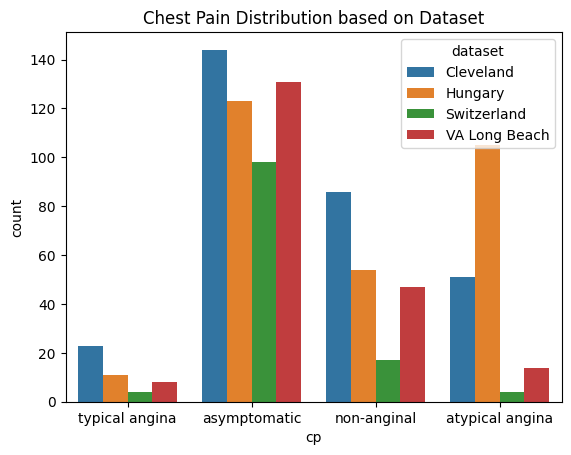

In [20]:
#plot the cp based on dataset column
sns.countplot(data=df, x='cp', hue='dataset')
plt.title('Chest Pain Distribution based on Dataset')
plt.show()

In [21]:
#plot the cp based on age column using plotly
fig = px.histogram(df, x='age', color='cp')
fig.show()

Dealing with missing values

In [22]:
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)

,0
ca,611
thal,486
slope,309
fbs,90
oldpeak,62
trestbps,59
exang,55
thalch,55
chol,30
restecg,2


In [23]:
missing_data_cols = df.isnull().sum()[df.isnull().sum() > 0].index.tolist()
missing_data_cols

['trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalch',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

In [24]:
categorical_cols = ['thal', 'ca', 'slope', 'exang', 'restecg','fbs', 'cp', 'sex', 'num']
bool_cols = ['fbs', 'exang']
numeric_cols = ['oldpeak', 'thalch', 'chol', 'trestbps', 'age']

In [30]:
# define the function to impute the missing values

def impute_categorical_missing_data(passed_col):

    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]

    other_missing_cols = [col for col in missing_data_cols if col != passed_col]

    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    if passed_col in bool_cols:
        y = label_encoder.fit_transform(y)

    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    rf_classifier = RandomForestClassifier()

    rf_classifier.fit(X_train, y_train)

    y_pred = rf_classifier.predict(X_test)

    acc_score = accuracy_score(y_test, y_pred)

    print("The feature '"+ passed_col+ "' has been imputed with", round((acc_score * 100), 2), "accuracy\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass

    if len(df_null) > 0:
        df_null[passed_col] = rf_classifier.predict(X)
        if passed_col in bool_cols:
            df_null[passed_col] = df_null[passed_col].map({0: False, 1: True})
        else:
            pass
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])

    return df_combined[passed_col]

def impute_continuous_missing_data(passed_col):

    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]

    other_missing_cols = [col for col in missing_data_cols if col != passed_col]

    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    rf_regressor = RandomForestRegressor()

    rf_regressor.fit(X_train, y_train)

    y_pred = rf_regressor.predict(X_test)

    print("MAE =", mean_absolute_error(y_test, y_pred), "\n")
    print("RMSE =", mean_squared_error(y_test, y_pred), "\n")
    print("R2 =", r2_score(y_test, y_pred), "\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass

    if len(df_null) > 0:
        df_null[passed_col] = rf_regressor.predict(X)
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])

    return df_combined[passed_col]

In [26]:
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)

,0
ca,611
thal,486
slope,309
fbs,90
oldpeak,62
trestbps,59
exang,55
thalch,55
chol,30
restecg,2


In [31]:
#using our function to impute the missing values using for loop
for col in missing_data_cols:
    print("Missing Values", col, ":", str(round((df[col].isnull().sum() / len(df)) * 100, 2))+"%")
    if col in categorical_cols:
        df[col] = impute_categorical_missing_data(col)
    elif col in numeric_cols:
        df[col] = impute_continuous_missing_data(col)
    else:
        pass

Missing Values trestbps : 6.41%
MAE = 13.943204633204633 

RMSE = 357.7945486486487 

R2 = 0.07310712894728222 

Missing Values chol : 3.26%
MAE = 48.35895131086142 

RMSE = 4515.669506367041 

R2 = 0.6431292514072329 

Missing Values fbs : 9.78%
The feature 'fbs' has been imputed with 80.72 accuracy

Missing Values restecg : 0.22%
The feature 'restecg' has been imputed with 66.67 accuracy

Missing Values thalch : 5.98%
MAE = 16.74473076923077 

RMSE = 461.5699742307692 

R2 = 0.3158065405350041 

Missing Values exang : 5.98%
The feature 'exang' has been imputed with 81.92 accuracy

Missing Values oldpeak : 6.74%
MAE = 0.5506937984496124 

RMSE = 0.6356386937984495 

R2 = 0.4513845678459274 

Missing Values slope : 33.59%
The feature 'slope' has been imputed with 66.85 accuracy

Missing Values ca : 66.41%
The feature 'ca' has been imputed with 66.67 accuracy

Missing Values thal : 52.83%
The feature 'thal' has been imputed with 71.76 accuracy



In [32]:
#check if there are any missing values
df.isnull().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0


Missing values are imputed.

Dealing with Outliers

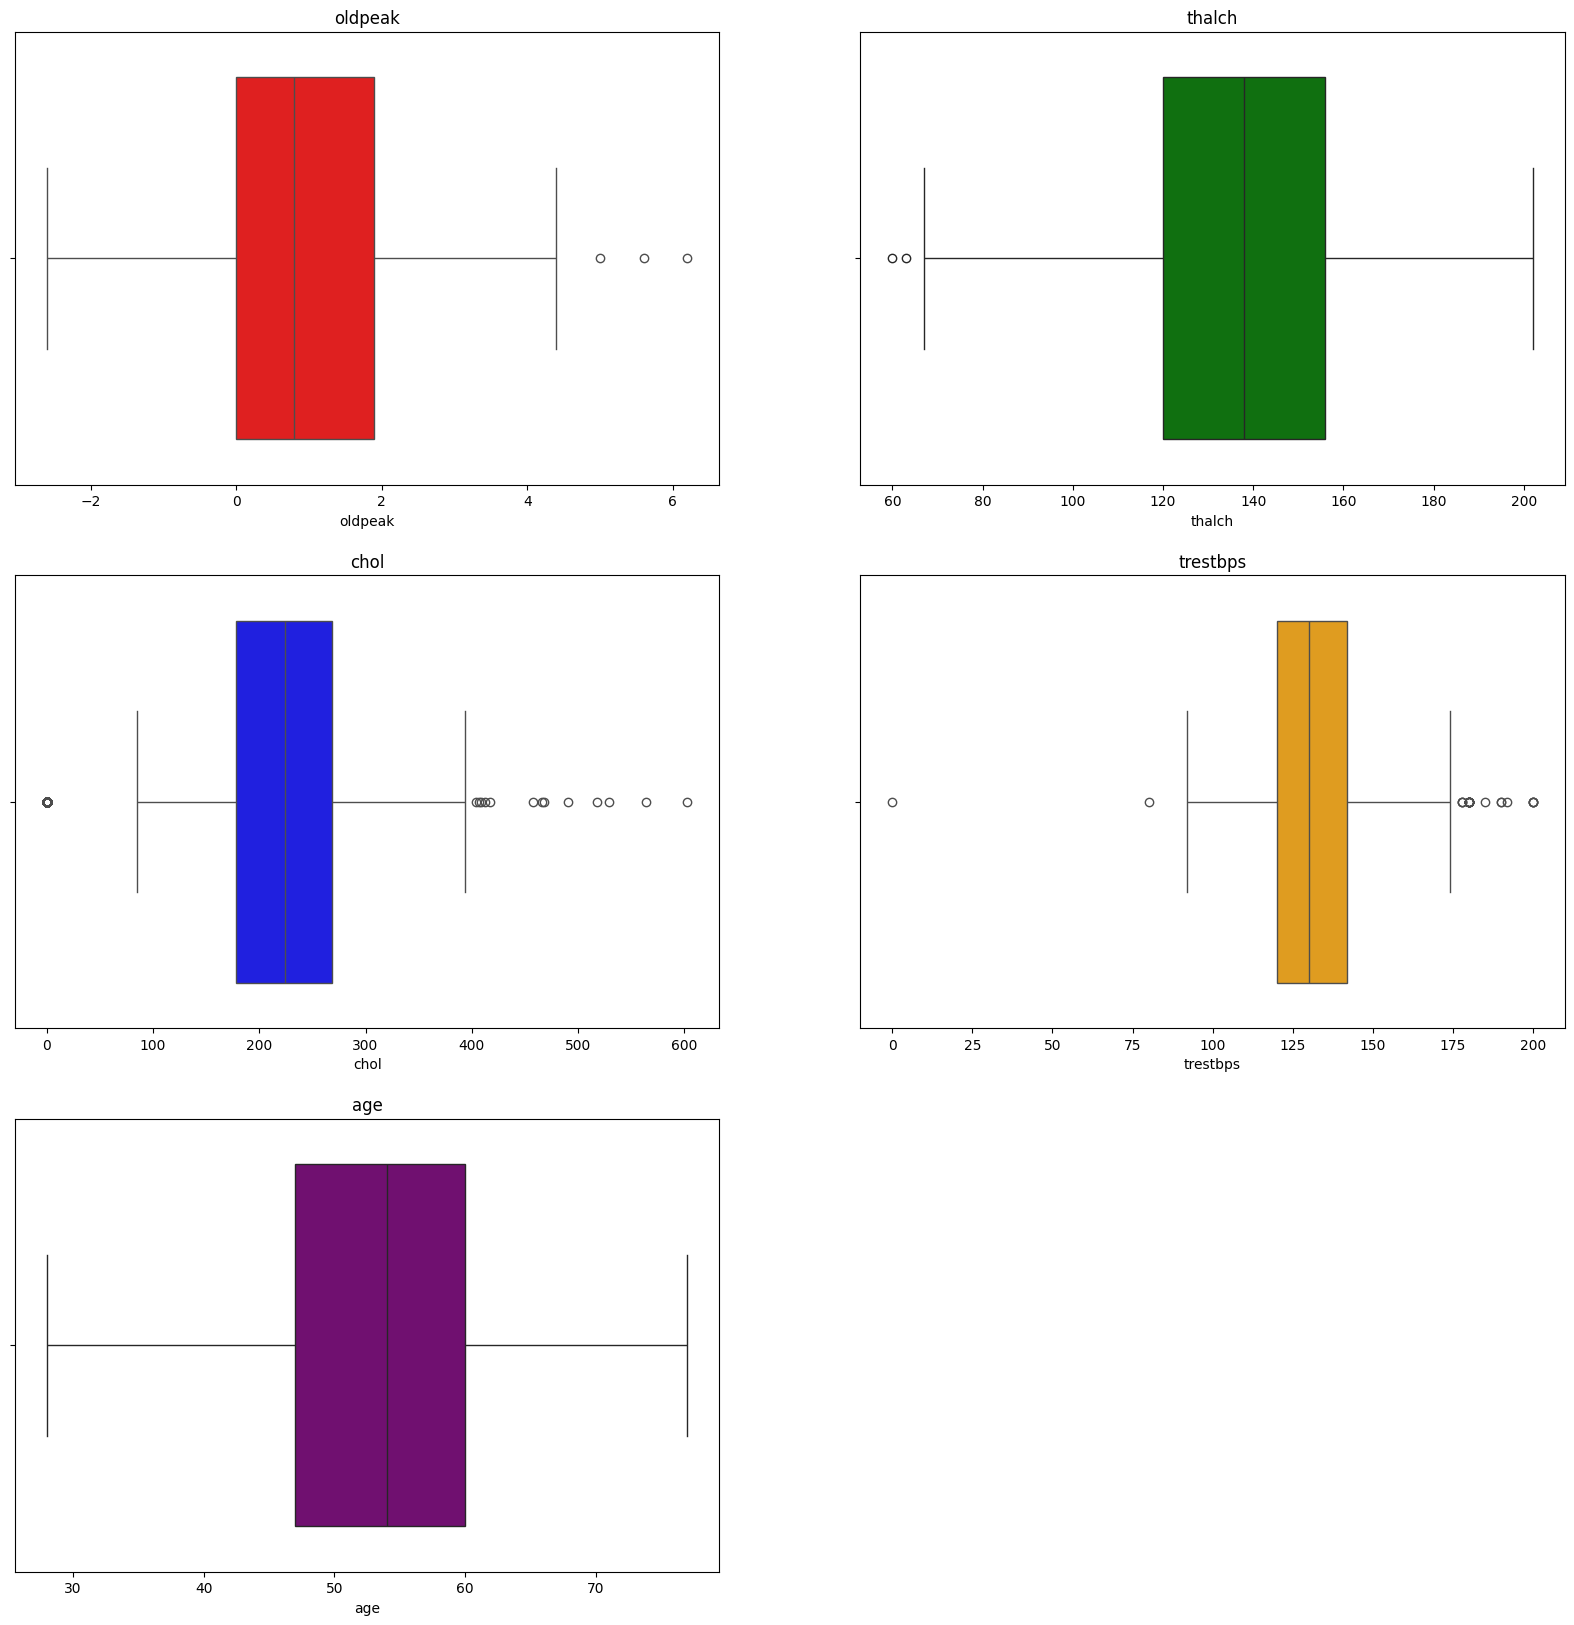

In [33]:
#box plot of all numeric columns using for loop
plt.figure(figsize=(20, 20))

colors = ['red', 'green', 'blue', 'orange', 'purple']

for i, col in enumerate(numeric_cols):
    plt.subplot(3, 2, i+1)
    sns.boxplot(x=df[col], color=colors[i])
    plt.title(col)
plt.show()

In [34]:
#plot box plot for all numeric columns using for loop in plotly
fig = px.box(df, y='age', title='Age Box Plot')
fig.show()

fig = px.box(df, y='trestbps', title='Trestbps Box Plot')
fig.show()

fig = px.box(df, y='chol', title='Chol Box Plot')
fig.show()

fig = px.box(df, y='thalch', title='Thalach Box Plot')
fig.show()

fig = px.box(df, y='oldpeak', title='Oldpeak Box Plot')
fig.show()

In [35]:
# defining a function for outlier treatment using z-score
def outlier_treatment(df , col):

    # Calculate the Z-scores for each value in the column
    z_scores = np.abs((df[col] - df[col].mean()) / df[col].std())

    # Define the threshold for identifying outliers
    threshold = 3

    # identify rows where any column has a Z-score above the threshold
    outliers = (z_scores > threshold)

    # the number of rows identified as outliers
    print(f'Number of rows identified as outliers in {col}: {outliers.sum()}')

    # Remove the outliers
    df = df[~outliers]

    # print statement
    print('Z score has been successfully applied on {}.'.format(col))

    # returning the dataframe
    return df

In [36]:
# aaplying outlier_treatment function on trestbps
df = outlier_treatment(df , 'trestbps')

Number of rows identified as outliers in trestbps: 8
Z score has been successfully applied on trestbps.


In [37]:
# applying outlier_treatment function on chol
df = outlier_treatment(df , 'chol')

Number of rows identified as outliers in chol: 3
Z score has been successfully applied on chol.


In [38]:
# # Dropping rows where 'trestbps' or 'chol' are 0, as these values are not medically possible.
df = df[df['chol'] != 0]

In [39]:
# check the row where trestbps is 0
df[df['trestbps']==0]

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num


In [40]:
# Remove the row where trestbps is not equal to zero
df=df[df['trestbps']!=0]
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 740 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        740 non-null    int64  
 1   age       740 non-null    int64  
 2   sex       740 non-null    object 
 3   dataset   740 non-null    object 
 4   cp        740 non-null    object 
 5   trestbps  740 non-null    float64
 6   chol      740 non-null    float64
 7   fbs       740 non-null    object 
 8   restecg   740 non-null    object 
 9   thalch    740 non-null    float64
 10  exang     740 non-null    object 
 11  oldpeak   740 non-null    float64
 12  slope     740 non-null    object 
 13  ca        740 non-null    float64
 14  thal      740 non-null    object 
 15  num       740 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 98.3+ KB


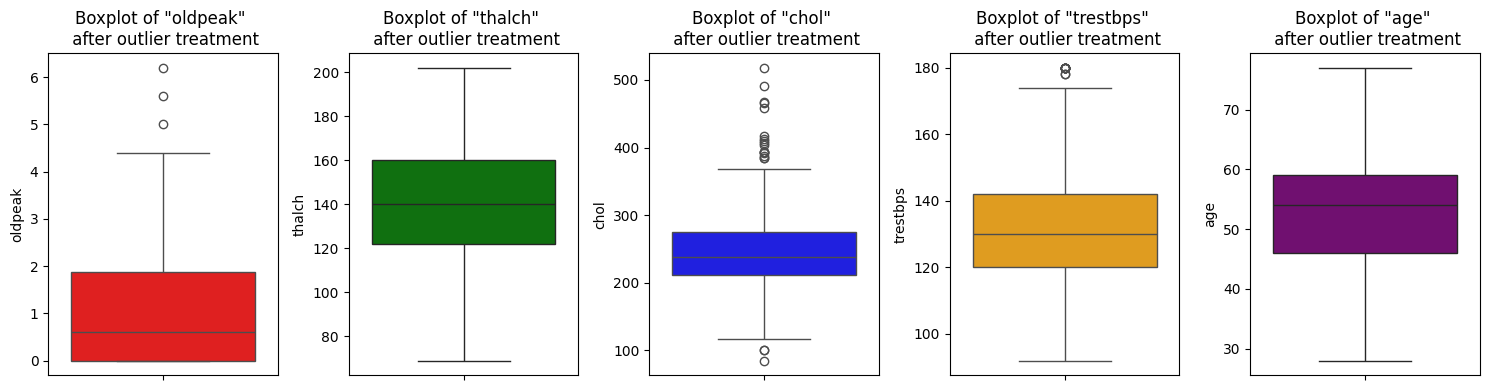

In [42]:
# setting up the figure size
plt.figure(figsize=(15, 4))
colors = ['red', 'green', 'blue', 'orange', 'purple']

# loop through each column
for i in range(len(numeric_cols)):
    # create a subplot
    plt.subplot(1, len(numeric_cols), i + 1)
    # plotting the boxplot
    sns.boxplot(y=df[numeric_cols[i]], color=colors[i])
    # adding title
    plt.title(f'Boxplot of "{numeric_cols[i]}" \n after outlier treatment')

plt.tight_layout()

plt.show()

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 740 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        740 non-null    int64  
 1   age       740 non-null    int64  
 2   sex       740 non-null    object 
 3   dataset   740 non-null    object 
 4   cp        740 non-null    object 
 5   trestbps  740 non-null    float64
 6   chol      740 non-null    float64
 7   fbs       740 non-null    object 
 8   restecg   740 non-null    object 
 9   thalch    740 non-null    float64
 10  exang     740 non-null    object 
 11  oldpeak   740 non-null    float64
 12  slope     740 non-null    object 
 13  ca        740 non-null    float64
 14  thal      740 non-null    object 
 15  num       740 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 98.3+ KB


Resting Blood Pressure (trestbps) Column

The normal resting blood pressure is 120/80 mm Hg.

1.High BP (Hypertension): Can lead to heart disease, stroke.

2.Low BP (Hypotension): May cause dizziness, fainting.

In [44]:
#summary statistics of trestbps column
df['trestbps'].describe()

,trestbps
count,740.000000
mean,132.890270
std,16.698507
min,92.000000
25%,120.000000
50%,130.000000
75%,142.000000
max,180.000000


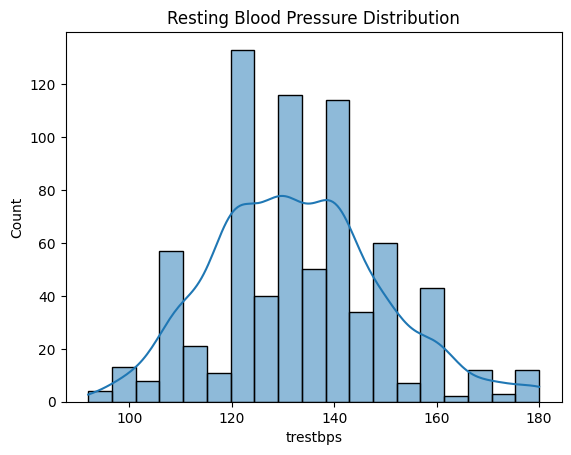

In [45]:
#histogram of trestbps column
sns.histplot(df['trestbps'], kde=True)
plt.title('Resting Blood Pressure Distribution')
plt.show()

In [46]:
df['trestbps'].value_counts().nlargest(5)

,count
trestbps,
120.0,110
130.0,100
140.0,90
150.0,49
110.0,47


Observation: Majority of the Patients have Resting Blood pressure ranges from 110-150 mm Hg.

In [47]:
#Plot the distribution of trestbps based on gender
fig = px.histogram(df, x='trestbps', color='sex')
fig.show()

According to our dataset, Females have higher resting blood pressure as compared to males.

Chol Column

The normal cholesterol level is less than 200 mg/dL

In [48]:
df['chol'].describe()

,chol
count,740.000000
mean,245.559554
std,54.271649
min,85.000000
25%,211.000000
50%,238.500000
75%,275.000000
max,518.000000


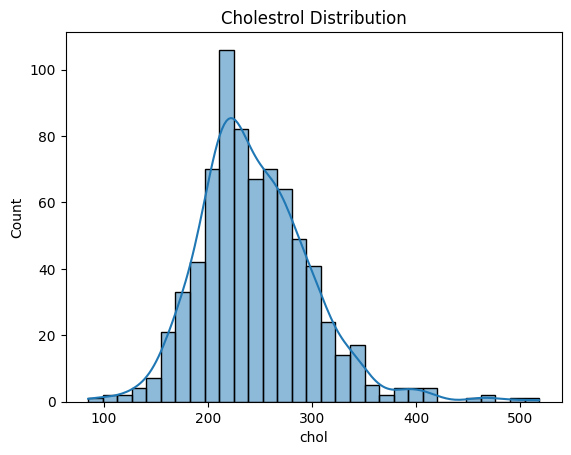

In [49]:
#plot the chol column
sns.histplot(df['chol'], kde=True)
plt.title('Cholestrol Distribution')
plt.show()

In [50]:
df['chol'].value_counts().nlargest(5)

,count
chol,
254.0,10
220.0,10
204.0,9
216.0,9
230.0,9


observation: The majority of the patients have cholesterol levels between 200-300 mg/dl. Which is slightly higher than the normal range.

In [51]:
#Age Column binning
df['age_bins'] = pd.cut(df['age'], bins=[0, 30, 40, 50, 60, 70, 80], labels=['0-30', '31-40', '41-50', '51-60', '61-70', '71-80'])

In [52]:
df['age_bins'].value_counts()

,count
age_bins,
51-60,301
41-50,202
61-70,138
31-40,74
71-80,20
0-30,5


In [53]:
df.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num',
       'age_bins'],
      dtype='object')

<Axes: xlabel='age_bins', ylabel='chol'>

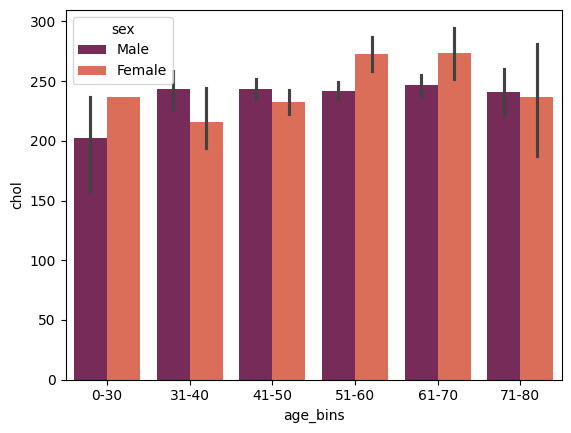

In [54]:
sns.barplot(data=df, x='age_bins',y='chol', hue='sex', palette='rocket')

In [55]:
#which category has the highest cholestrol
df.groupby('age_bins')['chol'].median().sort_values(ascending=False)

,chol
age_bins,
61-70,253.00
51-60,239.00
41-50,235.50
71-80,231.00
0-30,230.97
31-40,223.00


The cholesterol level is highest among the age group of 61-70 years.

FBS Column

bs column tells us about the fasting blood sugar levels of the patients.

In [56]:
df['fbs'].value_counts()

,count
fbs,
False,621
True,119


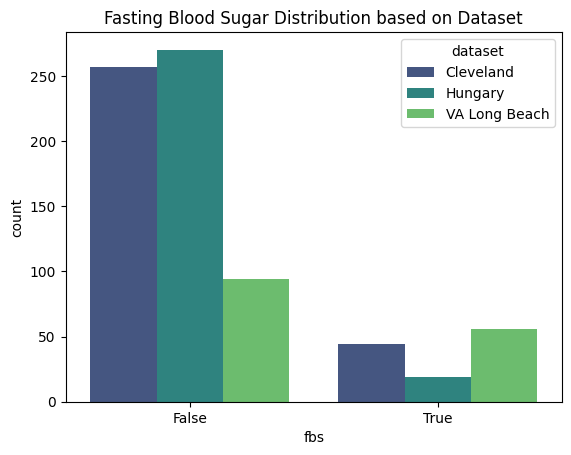

In [57]:
#make a good plot of fbs column using sns
sns.countplot(data=df, x='fbs', hue='dataset', palette='viridis')
plt.title('Fasting Blood Sugar Distribution based on Dataset')
plt.show()

Observation: The majority of the patients have fasting blood sugar levels less than 120 mg/dl.

Restecg Column

In [58]:
df['restecg'].value_counts()

,count
restecg,
normal,441
lv hypertrophy,173
st-t abnormality,126


Normal:A healthy ECG reading with no signs of heart problems.

LV Hypertrophy: Thickening of the heart's left side, which can happen when the heart works too hard.

ST-T Abnormality: Unusual patterns in part of the ECG that may point to heart issues like reduced blood flow or heart attack.

In [59]:
#plot restecg using plotly count plot
fig = px.histogram(df, x='age_bins', color='restecg', barmode='group', title='Resting ECG Results Based on Age')
fig.show()

Observation: According to our dataset, majority of the patients have normal Resting ECG but some patients have ST-T wave abnormality. which may indicate heart issues

Thalch Column

In [60]:
df['thalch'].value_counts().nlargest(5)

,count
thalch,
150.0,38
140.0,37
130.0,25
160.0,24
120.0,21


age_bins
0-30     177.400000
31-40    157.461216
41-50    146.272129
51-60    136.829236
61-70    129.826812
71-80    121.181000
Name: thalch, dtype: float64


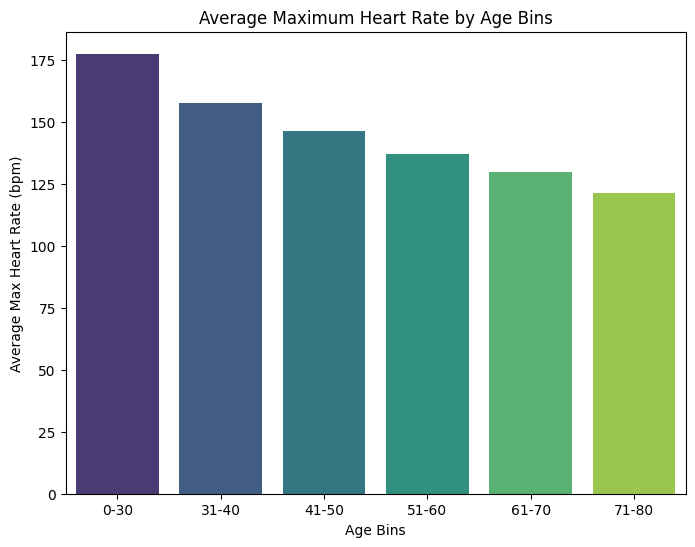

In [61]:
#groupby thalch based on age_bins
average_thalch = df.groupby('age_bins')['thalch'].mean().sort_values(ascending=False)
print(average_thalch)
#plotting it
plt.figure(figsize=(8, 6))
sns.barplot(x=average_thalch.index, y=average_thalch.values, palette='viridis')
plt.title('Average Maximum Heart Rate by Age Bins')
plt.xlabel('Age Bins')
plt.ylabel('Average Max Heart Rate (bpm)')
plt.show()

Observation: The young age group has a higher heart rate as compared to the older age group

Exang Column

This Column indicates whether a person experiences angina (chest pain) during physical exertion.

True: The individual experiences angina when exercising.
False: The individual does not experience angina when exercising

In [62]:
df['exang'].value_counts()

,count
exang,
False,445
True,295


<Axes: xlabel='exang', ylabel='count'>

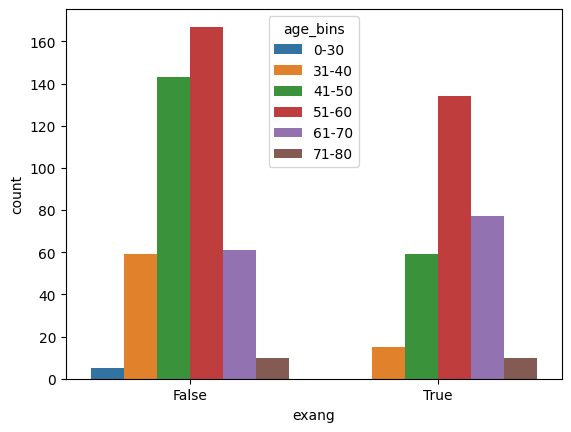

In [63]:
sns.countplot(data=df,x='exang',hue='age_bins')

Observation: According to our dataset, the majority of the patients does not experience angina during physical exertion but age group 51-60 has the highest number of patients who experience angina during physical exertion.

Oldpeak Column

1. It indicates how much the ST segment falls below the baseline during exercise.\ 2. A higher oldpeak value suggests more significant ST depression, which can indicate myocardial ischemia (reduced blood flow to the heart).

In [64]:
df['oldpeak'].value_counts().nlargest(5)

,count
oldpeak,
0.0,316
1.0,66
2.0,56
1.5,34
3.0,23


0: No ST depression (normal, healthy heart response).

0 to 1 mm: Mild ST depression, usually not concerning but can be observed in some cases.

Greater than 1 mm: Clinically significant ST depression, which may indicate myocardial ischemia (reduced blood flow to the heart) and is often associated with coronary artery disease.

In [65]:
#groupby oldpeak based on age_bins
df.groupby('age_bins')['oldpeak'].mean().sort_values(ascending=False)

,oldpeak
age_bins,
61-70,1.540522
71-80,1.510750
51-60,1.060090
41-50,0.650946
31-40,0.501959
0-30,0.000000


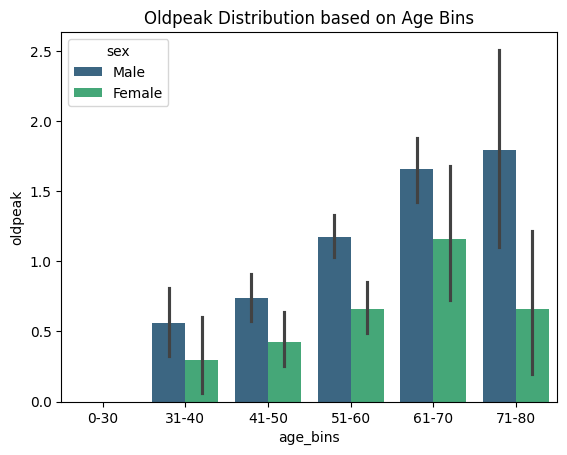

In [66]:
#plot oldpeak column based on age_bins using sns
sns.barplot(data=df, x='age_bins', y='oldpeak', palette='viridis',hue='sex')
plt.title('Oldpeak Distribution based on Age Bins')
plt.show()

Observations:

ST depression (oldpeak) rises with age, showing a higher risk of heart issues in older age groups.

Age groups 51-80 have average oldpeak values over 1 mm, indicating clinically significant heart stress.

The 61-70 group has the highest average oldpeak (1.52 mm), suggesting increased heart disease risk in this age bracket.
Males have higher oldpeak values as compared to Femlaes.

Slope column

Flat (427 cases): Most common slope, indicating a higher likelihood of ischemia.
Upsloping (254 cases): Suggests healthier heart function; less concerning.
Downsloping (59 cases): Least common but most alarming, indicating severe heart disease.

In [67]:
df['slope'].value_counts()

,count
slope,
flat,420
upsloping,269
downsloping,51


In [68]:
#groupby slope based on age_bins
df.groupby('age_bins')['slope'].value_counts()

age_bins  slope      
0-30      upsloping        4
          flat             1
          downsloping      0
31-40     upsloping       37
          flat            35
          downsloping      2
41-50     flat           112
          upsloping       85
          downsloping      5
51-60     flat           176
          upsloping      108
          downsloping     17
61-70     flat            87
          upsloping       30
          downsloping     21
71-80     flat             9
          downsloping      6
          upsloping        5
Name: count, dtype: int64

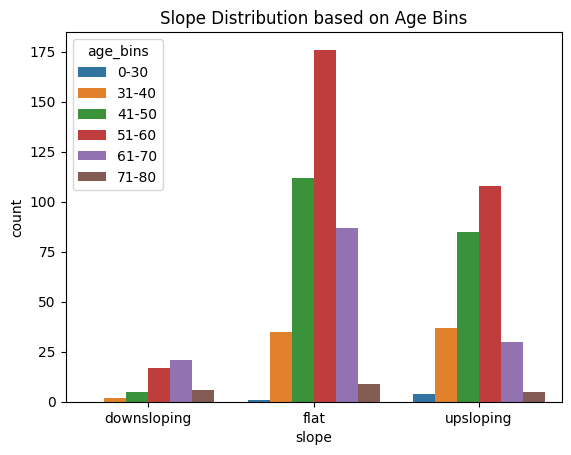

In [69]:
#plot the slope column based on age_bins using sns
sns.countplot(data=df, x='slope', hue='age_bins')
plt.title('Slope Distribution based on Age Bins')
plt.show()

Observations:

Younger Age Groups (0-40): Primarily exhibit upsloping and flat slopes, suggesting relatively healthier heart responses.

Middle Age Groups (41-60): Higher counts of flat slopes (up to 177) indicate an increase in potential ischemia risk.

Older Age Groups (61-80): A mix of slopes, with a notable presence of downsloping (8 cases in 71-80), indicating a concerning trend toward severe heart conditions.

CA Column

0: No major vessels colored (indicating no visible blockages).

1: One major vessel colored.

2: Two major vessels colored.

3: Three major vessels colored (indicating significant blockage or severe coronary artery disease).

In [70]:
df['ca'].value_counts()

,count
ca,
0.0,544
1.0,110
2.0,66
3.0,20


In [71]:
#groupby ca based on age_bins & sex
df.groupby(['age_bins', 'sex'])['ca'].count().reset_index()

,age_bins,sex,ca
0,0-30,Female,1
1,0-30,Male,4
2,31-40,Female,17
3,31-40,Male,57
4,41-50,Female,58
5,41-50,Male,144
6,51-60,Female,68
7,51-60,Male,233
8,61-70,Female,32
9,61-70,Male,106


<Axes: xlabel='age_bins', ylabel='ca'>

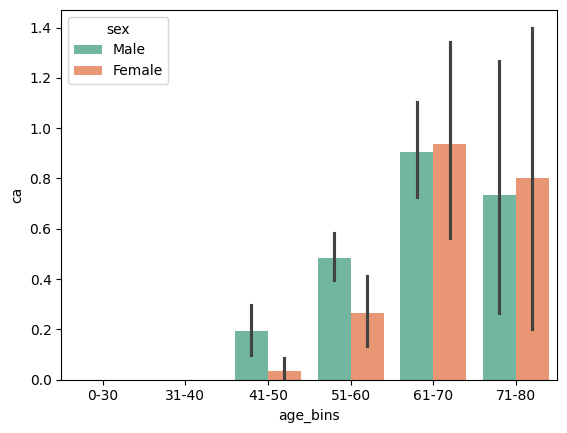

In [72]:
#plot ca based on age_bins
sns.barplot(data=df, x='age_bins',y='ca',hue='sex', palette='Set2')

Observations:

Males show more affected vessels across all age bins.

Significant rise in affected vessels with age, especially in males aged 51-60 (233 cases).

Few cases in the 0-30 age group (1 female, 4 male).

Notable increase in the 41-50 age group (144 males).

Thal Column

Helps diagnose coronary artery disease and guides treatment decisions based on blood flow patterns.

In [73]:
df['thal'].value_counts()

,count
thal,
reversable defect,355
normal,336
fixed defect,49


Reversible Defect (353 cases): Indicates temporary reduced blood flow during stress, suggesting ischemia.

Normal (325 cases): Shows normal blood flow, indicating no significant heart disease.

Fixed Defect (62 cases): Indicates permanent reduced blood flow, suggesting previous heart damage.

In [74]:
df.groupby(['age_bins', 'sex'])['thal'].size().reset_index()

,age_bins,sex,thal
0,0-30,Female,1
1,0-30,Male,4
2,31-40,Female,17
3,31-40,Male,57
4,41-50,Female,58
5,41-50,Male,144
6,51-60,Female,68
7,51-60,Male,233
8,61-70,Female,32
9,61-70,Male,106


<Axes: xlabel='age_bins', ylabel='count'>

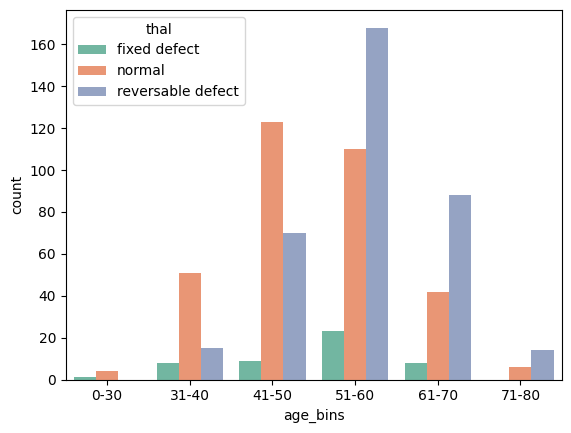

In [75]:
sns.countplot(data=df, x='age_bins', hue='thal', palette='Set2')

<Axes: xlabel='sex', ylabel='count'>

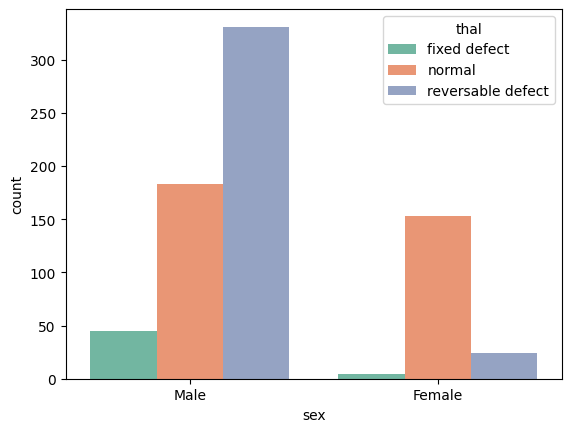

In [76]:
sns.countplot(data=df, x='sex', hue='thal', palette='Set2')

Observations:

Very few cases (1 female, 4 males) in 0-30 age group, indicating low heart disease risk.


Significant increase in 41-50 age group, especially in males (144 cases), indicating higher risk.

Highest count in 51-60 age group (233 males), suggesting urgent monitoring.

Females consistently show lower counts across all age bins.

Notable cases in 61-70 age group (32 females, 106 males), highlighting increased risk.

Num Column

In [77]:
df['num'].value_counts()

,count
num,
0,389
1,199
3,68
2,63
4,21


0 = no heart disease

1 = mild heart disease

2 = moderate heart

3 = severe heart disease

4 = critical heart disease

In [78]:
df.groupby(['age_bins', 'sex', 'num']).size().reset_index(name='count')

,age_bins,sex,num,count
0,0-30,Female,0,1
1,0-30,Female,1,0
2,0-30,Female,2,0
3,0-30,Female,3,0
4,0-30,Female,4,0
5,0-30,Male,0,4
6,0-30,Male,1,0
7,0-30,Male,2,0
8,0-30,Male,3,0
9,0-30,Male,4,0


<Axes: xlabel='num', ylabel='count'>

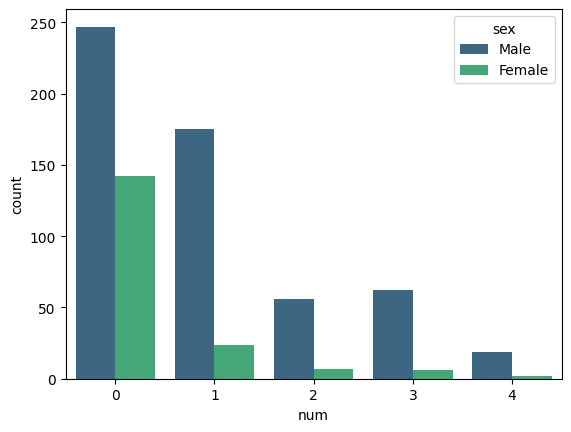

In [79]:
#plot num column on age_bins
sns.countplot(data=df, x='num', hue='sex', palette='viridis')

Observations:

Minimal heart disease predictions in the 0-30 age group.

Significant cases (especially num values 1 and 2) in the 41-50 age group.

Severe predictions rise in 51-60 and 61-70 age groups for males.

Females show fewer predicted heart disease cases overall.

**Machine Learning**

The Target Column is num which is the predicted attribute. We will use this column to predict the heart disease. The unique values in this column are: [0, 1, 2, 3, 4], which states that there are 5 types of heart diseases.

0 = no heart disease

1 = mild heart disease

2 = moderate heart disease

3 = severe heart disease

4 = critical heart disease

For this project, we will convert the num column into a binary classification problem. We will consider the following values:

0 = no heart disease

1 = heart disease

It will make easy a model to predict the heart disease.

In [80]:
#split the data into X and Y
X = df.drop(['num','id'], axis=1)
y = df['num']
#target engineering on num
y = np.where((y == 1) | (y == 2) | (y == 3) | (y == 4), 1,0)

In [81]:
label_encoder = LabelEncoder()

for col in X.columns:
    if X[col].dtype == 'object' or X[col].dtype == 'category':
        X[col] = label_encoder.fit_transform(X[col])
    else:
        pass

In [82]:
print(numeric_cols)

['oldpeak', 'thalch', 'chol', 'trestbps', 'age']


In [83]:
#Scaling numeric columns
min_max_scaler = MinMaxScaler()
X[numeric_cols] = min_max_scaler.fit_transform(X[numeric_cols])

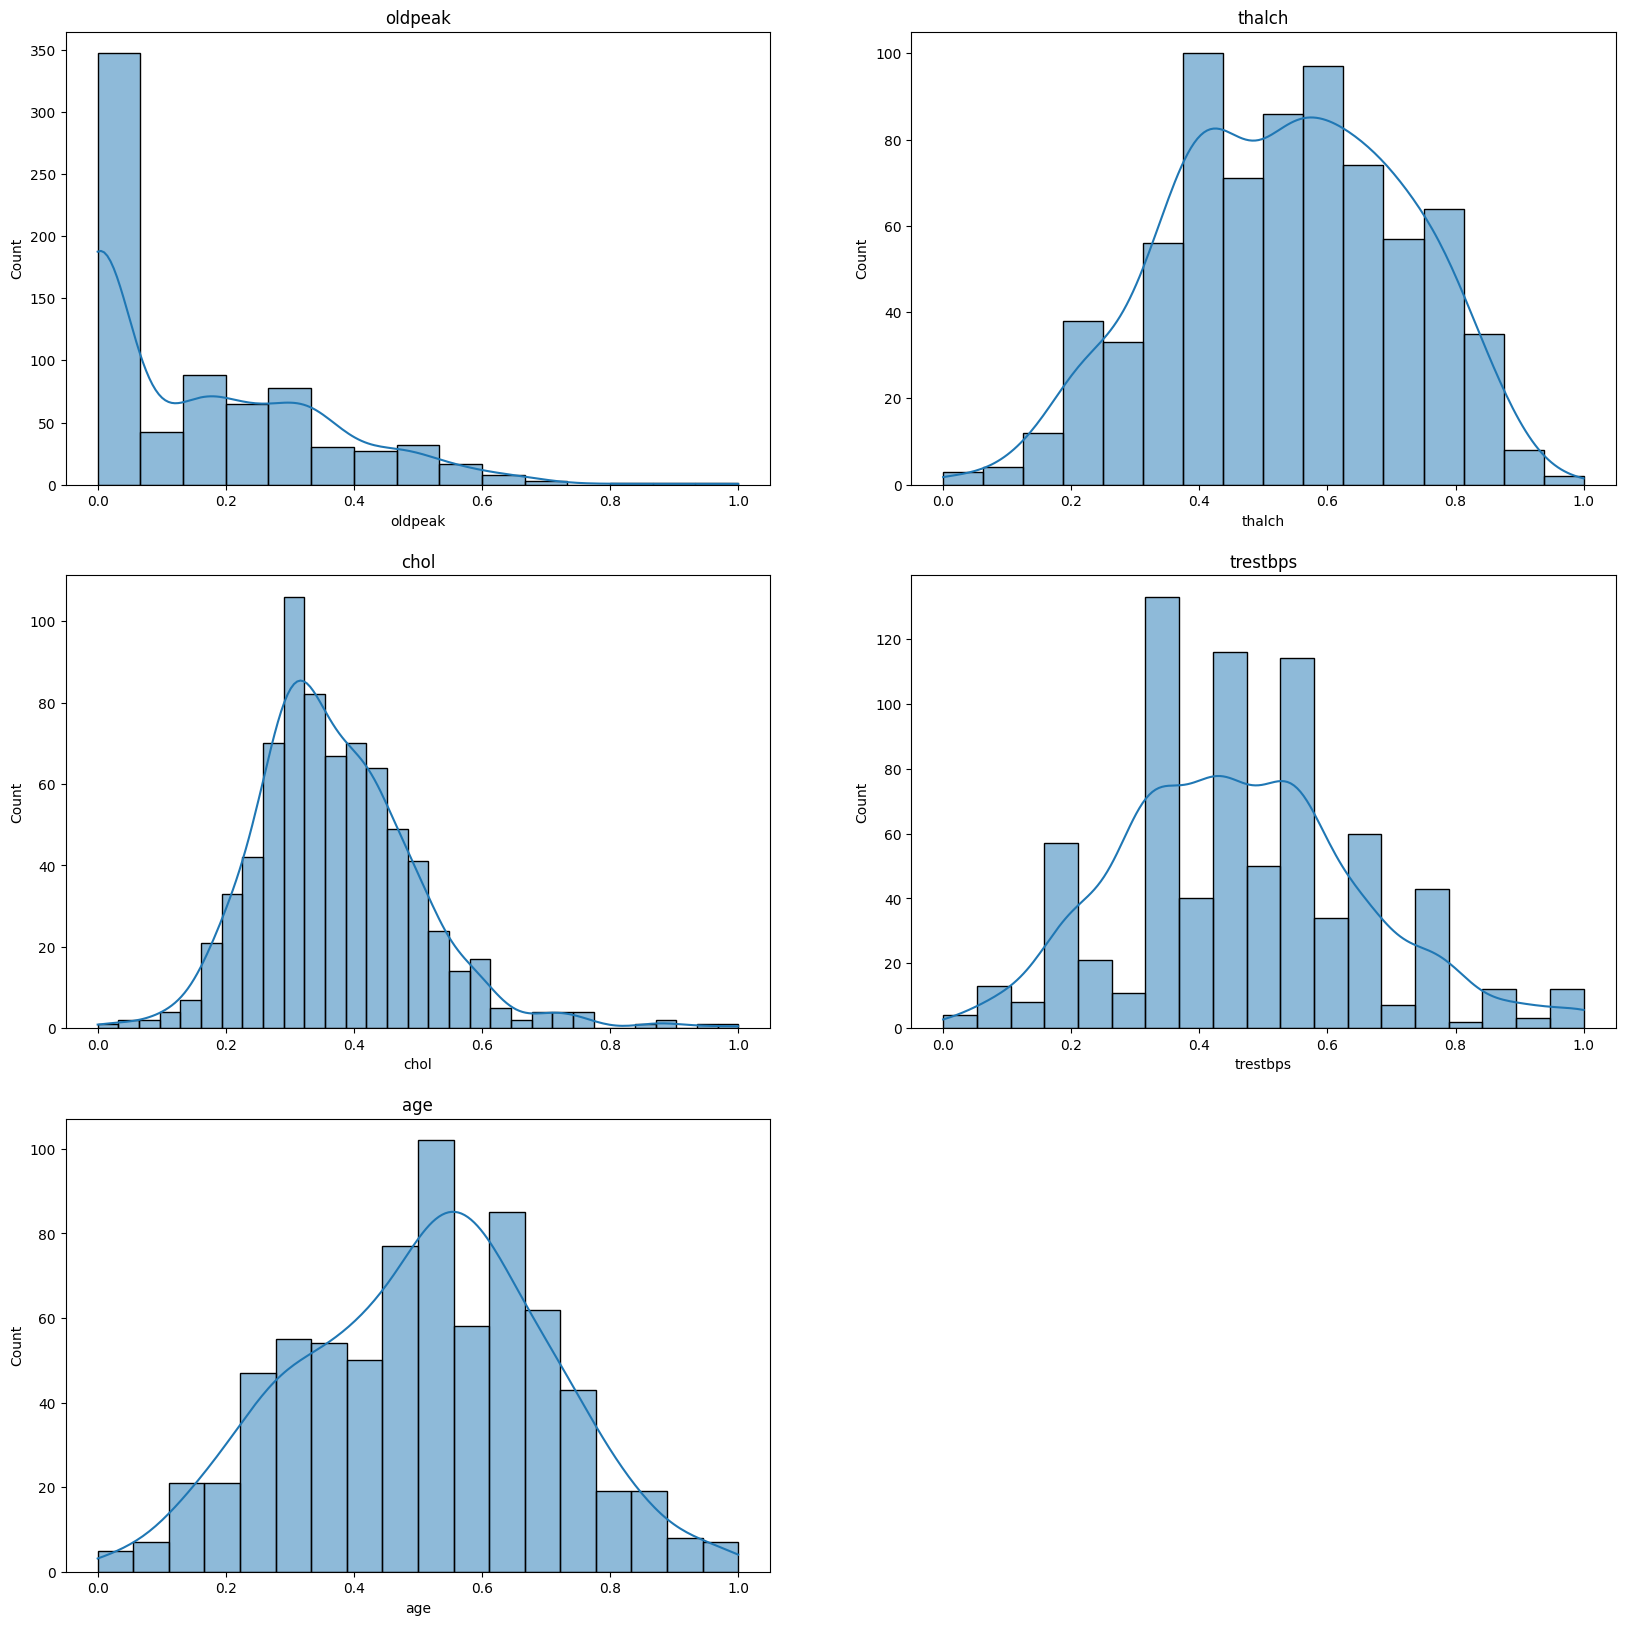

In [84]:
#plot all numeric columns
plt.figure(figsize=(20,20))
for i, col in enumerate(numeric_cols):
    plt.subplot(3,2, i+1)
    sns.histplot(X[col], kde=True)
    plt.title(col)

In [85]:
# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

The following models will be used to predict the heart disease:

1.Random Forest

2.Support Vector Machine (SVM)

3.Logistic Regression

4.K-Nearest Neighbors (KNN)

5.Decision Tree


In [86]:
# Define models and hyperparameters
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Support Vector Machine': SVC(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

params = {
    'Random Forest': {
        'model__n_estimators': [100, 200, 300],
        'model__max_depth': [ 10,20],
        'model__min_samples_split': [2, 5]
    },
    'Support Vector Machine': {
        'model__C': [1, 10],
        'model__gamma': [0.1, 0.01]
    },
    'Logistic Regression': {
        'model__C': [1, 10],
        'model__solver': ['lbfgs', 'liblinear']
    },
    'K-Nearest Neighbors': {
        'model__n_neighbors': [3, 5],
        'model__weights': ['uniform', 'distance']
    },
    'Decision Tree': {
        'model__criterion': ['gini', 'entropy'],
        'model__max_depth': [None, 10],
        'model__min_samples_split': [2, 5]
    }
}

# Initialize best model tracking
best_model = None
best_accuracy = 0.0

# Train and evaluate each model
for name, model in models.items():
    print(f"Training {name}...")

    # Create a pipeline with the model
    pipeline = Pipeline([
        ('model', model)
    ])

    # Get hyperparameters for the current model
    model_params = params.get(name, {})

    # Create GridSearchCV with the pipeline and parameters
    grid_search = GridSearchCV(pipeline, model_params, cv=5, n_jobs=-1, verbose=0)

    # Fit the pipeline
    grid_search.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = grid_search.predict(X_test)

    # Print evaluation metrics
    print(f"{name} - Best Parameters: {grid_search.best_params_}")
    print(f"{name} - Best Score: {grid_search.best_score_}")
    print(f"{name} - Test Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"{name} - Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
    print(f"{name} - Classification Report:\n{classification_report(y_test, y_pred)}")
    print('\n')

    if accuracy_score(y_test, y_pred) > best_accuracy:
        best_accuracy = accuracy_score(y_test, y_pred)
        best_model = grid_search.best_estimator_

# print the best model & accuracy
print(f"The Best model is {best_model.named_steps['model']} with an accuracy of {best_accuracy*100}%")


# Save the best model (optional)
# import pickle
# pickle.dump(best_model, open('best_model.pkl', 'wb'))

Training Random Forest...
Random Forest - Best Parameters: {'model__max_depth': 10, 'model__min_samples_split': 2, 'model__n_estimators': 100}
Random Forest - Best Score: 0.8432432432432433
Random Forest - Test Accuracy: 0.8702702702702703
Random Forest - Confusion Matrix:
[[85 14]
 [10 76]]
Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.86      0.88        99
           1       0.84      0.88      0.86        86

    accuracy                           0.87       185
   macro avg       0.87      0.87      0.87       185
weighted avg       0.87      0.87      0.87       185



Training Support Vector Machine...
Support Vector Machine - Best Parameters: {'model__C': 10, 'model__gamma': 0.1}
Support Vector Machine - Best Score: 0.8324324324324325
Support Vector Machine - Test Accuracy: 0.8702702702702703
Support Vector Machine - Confusion Matrix:
[[86 13]
 [11 75]]
Support Vector Machine - Classification Report:

**Summary**

1.The minimum age to have a heart disease starts from 28 years old.

2.Most of the people get heart disease at the age of 53-54 years.

3.Most of the males and females get heart disease at the age of 54-55 years.

4.Male percentage in the data: 78.91%

5.Female Percentage in the data: 21.09%

6.Males are 274.23% more than females in the data.

7.We have highest number of people from Cleveland (304) and lowest from Switzerland (123).\ The highest number of females in this dataset are from Cleveland (97) and lowest from VA Long Beach (6).\ The highest number of males in this dataset are from Hungary (212) and lowest from Switzerland (113).

8.Majority of the Patients have Resting Blood pressure ranges from 110-150 mm Hg.

9.The majority of the patients have cholesterol levels between 200-300 mg/dl. Which is slightly higher than the normal range.

10.The majority of the patients have fasting blood sugar levels less than 120 mg/dl.

11.he majority of the patients have normal Resting ECG but some patients have ST-T wave abnormality. which may indicate heart issues.

12.The young age group has a higher heart rate as compared to the older age group.

13.The majority of the patients does not experience angina during physical exertion but age group 51-60 has the highest number of patients who experience angina during physical exertion.

14.ST depression (oldpeak) rises with age, showing a higher risk of heart issues in older age groups.\ Age groups 51-80 have average oldpeak values over 1 mm, indicating clinically significant heart stress.\ The 61-70 group has the highest average oldpeak (1.52 mm), suggesting increased heart disease risk in this age bracket.\ Males have higher oldpeak values as compared to Femlaes.

15.Younger Age Groups (0-40): Primarily exhibit upsloping and flat slopes, suggesting relatively healthier heart responses.\ Middle Age Groups (41-60): Higher counts of flat slopes (up to 177) indicate an increase in potential ischemia risk.\ Older Age Groups (61-80): A mix of slopes, with a notable presence of downsloping (8 cases in 71-80), indicating a concerning trend toward severe heart conditions.

16.Males show more affected vessels across all age bins.\ Significant rise in affected vessels with age, especially in males aged 51-60 (233 cases).\ Few cases in the 0-30 age group (1 female, 4 male).\ Notable increase in the 41-50 age group (144 males).

17.Very few cases (1 female, 4 males) in 0-30 age group, indicating low heart disease risk.\ Significant increase in 41-50 age group, especially in males (144 cases), indicating higher risk.\ Highest count in 51-60 age group (233 males), suggesting urgent monitoring.\ Females consistently show lower counts across all age bins.\ Notable cases in 61-70 age group (32 females, 106 males), highlighting increased risk.

18.Minimal heart disease predictions in the 0-30 age group.\ Significant cases (especially num values 1 and 2) in the 41-50 age group.\ Severe predictions rise in 51-60 and 61-70 age groups for males.\ Females show fewer predicted heart disease cases overall.

19.The model achieved an accuracy of over 90%, indicating strong predictive performance.\ The confusion matrix showed high true positives and true negatives, effectively distinguishing between patients with and without heart disease.\ Precision and recall were both high, minimizing false positives and ensuring most cases of heart disease were correctly identified.\ The F1 score was robust, balancing precision and recall.\ Feature importance analysis highlighted key factors impacting predictions, aiding in targeted healthcare strategies.

20.Imputing Missing Values:\ I imputed missing values using the Random Forest algorithm by training the model on features with complete data. The model predicted missing values based on the relationships learned from other features, providing more accurate imputation than simple methods.

21.Dealing with Outliers:\ I handled outliers using the Z-score method. I calculated the Z-scores for numeric features and identified outliers as those with Z-scores greater than 3 or less than -3. I then removed these outliers to ensure the model's accuracy and robustness.